In [4]:
with open('One.txt') as f1:
    one = f1.read().lower().split()
one

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [5]:
len(one)

13

In [6]:
oneUnique = set(one)
oneUnique

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [7]:
with open('Two.txt') as f2:
    two = f2.read().lower().split()
two

['this',
 'story',
 'is',
 'about',
 'surfing',
 'catching',
 'waves',
 'is',
 'fun',
 'surfing',
 'is',
 'a',
 'popular',
 'water',
 'sport']

In [8]:
twoUnique = set(two)
twoUnique

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [9]:
allUnique = set()
allUnique.update(oneUnique,twoUnique)

In [10]:
allUnique

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [11]:
words = {}
i = 0

for word in allUnique:
    words[word] = i
    i += 1
    
words

{'surfing': 0,
 'water': 1,
 'animals': 2,
 'fun': 3,
 'our': 4,
 'this': 5,
 'popular': 6,
 'story': 7,
 'are': 8,
 'dogs': 9,
 'a': 10,
 'furry': 11,
 'catching': 12,
 'canine': 13,
 'about': 14,
 'is': 15,
 'waves': 16,
 'pets': 17,
 'sport': 18}

In [12]:
oneFreq = [0]*len(words)
twoFreq = [0]*len(words)
allWords = ['']*len(words)

In [13]:
oneFreq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
twoFreq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
allWords

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [16]:
allWords2 = list(allUnique)

In [17]:
allWords2

['surfing',
 'water',
 'animals',
 'fun',
 'our',
 'this',
 'popular',
 'story',
 'are',
 'dogs',
 'a',
 'furry',
 'catching',
 'canine',
 'about',
 'is',
 'waves',
 'pets',
 'sport']

In [19]:
for word in one:
    if word in words:
        index = words[word]
        oneFreq[index]+=1

oneFreq

[0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0]

In [21]:
for word in two:
    if word in words:
        index = words[word]
        twoFreq[index]+=1
        
twoFreq

[2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1]

In [25]:
import pandas as pd
bag = pd.DataFrame(index=['one','two'],data=[oneFreq,twoFreq],columns=allWords2)
bag

,surfing,water,animals,fun,our,this,popular,story,are,dogs,a,furry,catching,canine,about,is,waves,pets,sport
one,0,0,1,0,1,1,0,1,1,2,1,1,0,1,1,1,0,1,0
two,2,1,0,1,0,1,1,1,0,0,1,0,1,0,1,3,1,0,1


In [26]:
text = ['This is a line',
           "This is another line",
       "Completely different line"]

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [28]:
cv = CountVectorizer()
sparseMat = cv.fit_transform(text)

In [30]:
sparseMat.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [31]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [32]:
cv = CountVectorizer(stop_words='english')
sparseMat = cv.fit_transform(text)

In [33]:
sparseMat.todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]])

In [37]:
tfidfTrans = TfidfTransformer()

In [35]:
cv = CountVectorizer()

In [36]:
counts = cv.fit_transform(text)

In [39]:
tfidf = tfidfTrans.fit_transform(counts)
tfidf.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [40]:
tfidf = TfidfVectorizer()

In [41]:
new = tfidf.fit_transform(text)
new.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [43]:
df = pd.read_csv("../DATA/airline_tweets.csv")

In [44]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [47]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='airline', ylabel='count'>

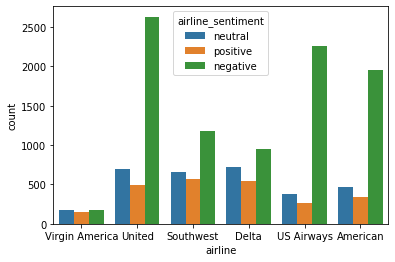

In [50]:
sns.countplot(data=df,hue='airline_sentiment',x='airline')

In [54]:
jj = df.groupby('airline')['airline_sentiment_confidence']
jj.first()

airline
American          1.0000
Delta             0.6469
Southwest         1.0000
US Airways        0.6292
United            1.0000
Virgin America    1.0000
Name: airline_sentiment_confidence, dtype: float64

In [56]:
jj.get_group('Delta')

6746     0.6469
6747     0.6869
6748     1.0000
6749     1.0000
6750     1.0000
          ...  
8963     1.0000
8964     1.0000
8965     1.0000
12038    1.0000
12039    0.7991
Name: airline_sentiment_confidence, Length: 2222, dtype: float64

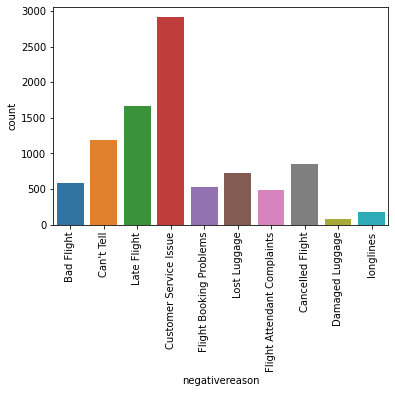

In [61]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

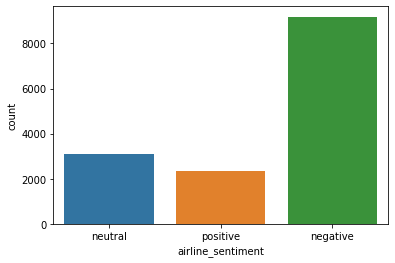

In [62]:
sns.countplot(data=df,x='airline_sentiment')

In [63]:
data = df[['airline_sentiment','text']]

In [64]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [65]:
X = data['text']
Y = data['airline_sentiment']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=101)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf = TfidfVectorizer(stop_words='english')

In [92]:
tfidf.fit(Xtrain)
Xtrain2  = tfidf.transform(Xtrain)
Xtest2 = tfidf.transform(Xtest)

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
nb = MultinomialNB()

In [93]:
nb.fit(Xtrain2,Ytrain)

MultinomialNB()

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log = LogisticRegression(max_iter=1000)

In [77]:
log.fit(Xtrain2,Ytrain)

LogisticRegression(max_iter=1000)

In [80]:
from sklearn.svm import LinearSVC

In [81]:
svc = LinearSVC()

In [82]:
svc.fit(Xtrain2,Ytrain)

LinearSVC()

In [83]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [95]:
def report(model):
    preds = model.predict(Xtest2)
    print(classification_report(Ytest,preds))
    plot_confusion_matrix(model,Xtest2,Ytest)

NB model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


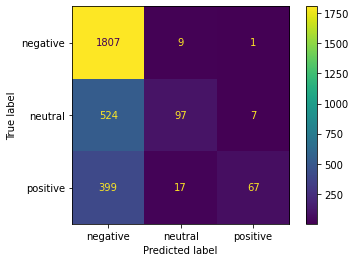

In [96]:
print('NB model')
report(nb)

Logistic model
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


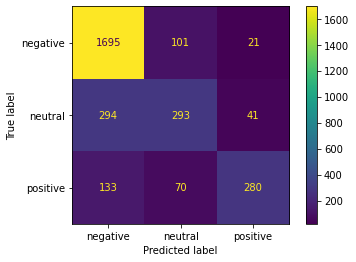

In [97]:
print('Logistic model')
report(log)

SVC model
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


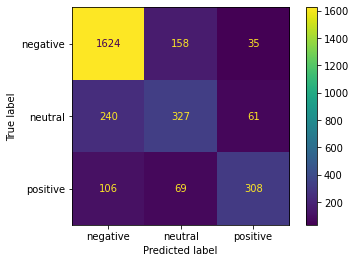

In [98]:
print('SVC model')
report(svc)

In [99]:
from sklearn.pipeline import Pipeline

In [101]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC())])

In [103]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [104]:
pipe.predict(['really bad flight'])

array(['negative'], dtype=object)

In [105]:
pipe.predict(['that was excellent'])

array(['positive'], dtype=object)

In [106]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [107]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [108]:
len(df)

2000

In [109]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [113]:
df = df.dropna(axis=0)

In [114]:
df[df['review'].isnull()]

,label,review


In [125]:
def empty(string):
    
    if string.isspace():
        return True
    else:
        return False

In [127]:
df[df['review'].apply(empty) == True]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [128]:
df = df[df['review'].apply(empty) == False]

In [131]:
df[~df['review'].apply(empty) == True]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [130]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
cv = CountVectorizer(stop_words='english')

In [136]:
negMatrix = cv.fit_transform(df[df['label']=='neg']['review'])
negMatrix

<969x27473 sparse matrix of type '<class 'numpy.int64'>'
	with 223948 stored elements in Compressed Sparse Row format>

In [147]:
posMatrix = cv.fit_transform(df[df['label']=='pos']['review'])
posMatrix

<969x29459 sparse matrix of type '<class 'numpy.int64'>'
	with 247042 stored elements in Compressed Sparse Row format>

In [139]:
cv.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0009f',
 '007',
 '05',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '105',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '1138',
 '118',
 '12',
 '121',
 '122',
 '1272',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '135',
 '137',
 '139',
 '13th',
 '14',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '153',
 '155',
 '1554',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '161',
 '165',
 '167',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1888',
 '1899',
 '18th',
 '19',
 '1900',
 '1908',
 '1912',
 '1914',
 '1919',
 '1920s',
 '1922',
 '1930',
 '1930s',
 '1932',
 '1934',
 '1935',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1951',
 '1953',
 '1954',
 '1955',
 '1957',
 '195

In [140]:
posMatrix.sum(axis=0)

matrix([[ 2, 55,  1, ..., 14,  1,  2]])

In [153]:
freqs = zip(cv.get_feature_names(),posMatrix.sum(axis=0).tolist()[0])

In [154]:
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [155]:
X = df['review']
Y= df['label']

In [156]:
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=101)

In [157]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])

In [158]:
pipe.fit(Xtrain,Ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


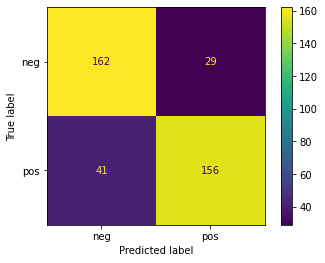

In [159]:
plot_confusion_matrix(pipe,Xtest,Ytest)

In [160]:
preds = pipe.predict(Xtest)

In [161]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388

